# Data Visualization Project
## Idea 1: 15 Years of BITS Hyderabad
### Members:
Ashutosh Wagh (2022H1030052H)<br>
Shivam Rajput (2022H1030058H)<br>
S Shashank (2022H1030067H)<br>
Ajinkya Medhekar (2022H1030099H)            

# Data Acquisition

In [ ]:

# Parameters
# num_students = 5000  # Change this to the desired dataset size
def createData(clgYear, num_students):
    courses = ["Biological Sciences", "Chemical Engineering", "Chemisty", "Civil Engineering", "Computer Science and Information Systems", "Economics and Finanace", "Electrical and Electronics Engineering", "Humanities and Social Sciences", "Mathematics", "Mechanical Engineering", "Pharmacy", "Physics"]
    Degree = ["B.E", "B.Pharm", "M.Sc", "M.E","Ph.D"]
    degreeAcronym = {"B.E":"A", "B.Pharm":"P", "M.Sc":"S", "M.E":"H","Ph.D":"D"}
    studentDistributionbyDegree = {"B.E":0.65, "B.Pharm":0.07, "M.Sc":0.05, "M.E":0.2,"Ph.D":0.03}
    min_cgpa = 5.0
    max_cgpa = 10.0
    min_year = 1
    max_year = 4

    # Create empty lists to store data
    student_ids = []
    course_list = []
    degree_list = []
    cgpa_list = []
    year_list = []

    degrees = []
    for degree, percentage in studentDistributionbyDegree.items():
        num_degree_students = int(num_students * percentage)
        degrees.extend([degree] * num_degree_students)

    # Shuffle the list of departments to randomize the assignments
    random.shuffle(degrees)

#     print(len(degrees))
    while len(degrees)!=num_students:
        degrees.append('B.E')
    # clgYear = 2019
    # Generate and store data
    for student_id in range(1, num_students + 1):
        course = random.choice(courses)
    #     degree = random.choice(Degree)
        degree = degrees[student_id - 1]
    #     print(degree)
        cgpa = round(random.uniform(min_cgpa, max_cgpa), 2)
        year = random.randint(min_year, max_year)
        student_id_str = str(student_id).zfill(4)
        roll_num = str(clgYear) + degreeAcronym[degree] + student_id_str + degreeAcronym[degree]
        student_ids.append(roll_num)
        course_list.append(course)
        degree_list.append(degree)
        cgpa_list.append(cgpa)
        year_list.append(year)

    # Create a DataFrame
    data = {
        "Student ID": student_ids,
        "Course": course_list,
        "Degree": degree_list,
        "CGPA": cgpa_list,
        "Year": year_list
    }

    df = pd.DataFrame(data)

    # Display the DataFrame
#     print(df)

    # You can save the DataFrame to a CSV file if needed
    df.to_csv("student_data_"+str(clgYear)+".csv", index=False)
#     return df


In [4]:
import random
import pandas as pd
import os
import seaborn as sns

In [ ]:
import pandas as pd
import random
import numpy as np

def createData(clgYear, num_students, min_cgpa=5.0, max_cgpa=10.0, min_year=1, max_year=4, output_file="student_data"):
    random.seed(42)  # Set a seed for reproducibility

    courses = ["Biological Sciences", "Chemical Engineering", "Chemisty", "Civil Engineering", "Computer Science and Information Systems", "Economics and Finanace", "Electrical and Electronics Engineering", "Humanities and Social Sciences", "Mathematics", "Mechanical Engineering", "Pharmacy", "Physics"]
    Degree = ["B.E", "B.Pharm", "M.Sc", "M.E", "Ph.D"]
    degreeAcronym = {"B.E": "A", "B.Pharm": "P", "M.Sc": "S", "M.E": "H", "Ph.D": "D"}

    # Control over Random Assignment for B.Pharm
    invalid_courses_for_bpharm = ["Mathematics", "Physics"]

    # Varying Student Distribution by Degree
    studentDistributionbyDegree = {"B.E": 0.65, "B.Pharm": 0.07, "M.Sc": 0.05, "M.E": 0.2, "Ph.D": 0.03}
    distribution_mean = 0.07
    distribution_std = 0.02

    degree_variation = np.random.normal(loc=distribution_mean, scale=distribution_std, size=len(studentDistributionbyDegree))
    degree_variation = np.clip(degree_variation, 0, None)

    updated_student_distribution = {
        degree: percentage + variation
        for degree, percentage, variation in zip(studentDistributionbyDegree.keys(), studentDistributionbyDegree.values(), degree_variation)
    }

    # Create empty lists to store data
    student_ids = []
    course_list = []
    degree_list = []
    cgpa_list = []
    year_list = []

    degrees = []
    for degree, percentage in updated_student_distribution.items():
        num_degree_students = int(num_students * percentage)
        degrees.extend([degree] * num_degree_students)

    # Shuffle the list of degrees to randomize the assignments
    random.shuffle(degrees)
#     print(len(degrees))
    while len(degrees) < num_students:
        degrees.append('B.E')

    # Generate and store data
    for student_id in range(1, num_students + 1):
        course = random.choice(courses)

        # Additional check for B.Pharm students
        if degrees[student_id - 1] == "B.Pharm" and course in invalid_courses_for_bpharm:
            # Regenerate course until a valid one is chosen
            while course in invalid_courses_for_bpharm:
                course = random.choice(courses)

        degree = degrees[student_id - 1]
        cgpa = round(random.uniform(min_cgpa, max_cgpa), 2)
        year = random.randint(min_year, max_year)
        student_id_str = str(student_id).zfill(4)
        roll_num = str(clgYear) + degreeAcronym[degree] + student_id_str + degreeAcronym[degree]
        student_ids.append(roll_num)
        course_list.append(course)
        degree_list.append(degree)
        cgpa_list.append(cgpa)
        year_list.append(year)

    # Create a DataFrame
    data = {
        "Student ID": student_ids,
        "Course": course_list,
        "Degree": degree_list,
        "CGPA": cgpa_list,
        "Year": year_list
    }
    df = pd.DataFrame(data)

    # Save the DataFrame to a CSV file
    df.to_csv(f"{output_file}_{str(clgYear)}.csv", index=False)


In [ ]:
year = 2007
num_students = 1500
while year < 2023:
    num_students = num_students + random.randint(300,1100)
    year = year +1
    print(num_students)
    createData(year, num_students)

1900
2659
3260
3929
4476
5186
5507
6190
6786
7455
7755
8787
9443
10098
10625
11366


# Data Preparation

In [8]:

def load_csvs_into_list(folder_path, file_pattern="student_data_*\.csv"):
    """
    Load all CSV files in a folder into a list of dataframes.

    Parameters:
    - folder_path (str): The path to the folder containing CSV files.
    - file_pattern (str): The pattern to match CSV file names.

    Returns:
    - List of pandas DataFrames.
    """
    dataframes = []

    # Iterate through files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv") and filename.startswith("student_data_"):
            file_path = os.path.join(folder_path, filename)

            # Extract year from the filename
            year = filename.split("_")[2].split(".")[0]

            # Read CSV into a dataframe and append to the list
            df = pd.read_csv(file_path)
            df['Year'] = year  # Adding a 'Year' column to the dataframe
            dataframes.append(df)

    return dataframes


In [9]:
folder_path = "./Student_Data/"
dataframes_list = load_csvs_into_list(folder_path)

# Access individual dataframes in the list
for idx, df in enumerate(dataframes_list):
    print(f"Dataframe {idx + 1} - Year: {df['Year'].unique()[0]}")
    print(df.head())
    print("\n")

Dataframe 1 - Year: 2011
   Student ID                                    Course Degree  CGPA  Year
0  2011H0001H                    Economics and Finanace    M.E  9.00  2011
1  2011H0002H                                  Chemisty    M.E  6.95  2011
2  2011H0003H                      Chemical Engineering    M.E  9.12  2011
3  2011A0004A                    Mechanical Engineering    B.E  7.18  2011
4  2011A0005A  Computer Science and Information Systems    B.E  6.11  2011


Dataframe 2 - Year: 2023
   Student ID                                    Course   Degree  CGPA  Year
0  2023A0001A                    Mechanical Engineering      B.E  6.69  2023
1  2023P0002P  Computer Science and Information Systems  B.Pharm  5.20  2023
2  2023P0003P                      Chemical Engineering  B.Pharm  7.10  2023
3  2023P0004P                    Mechanical Engineering  B.Pharm  7.00  2023
4  2023A0005A                                  Chemisty      B.E  7.56  2023


Dataframe 3 - Year: 2020
   Studen

# Data Visualisation

In [ ]:
import matplotlib.pyplot as plt

def plot_line_graph(dataframes_list):
    """
    Plot a line graph with the x-axis representing the year
    and the y-axis representing the number of elements in each dataframe.

    Parameters:
    - dataframes_list (list): List of pandas DataFrames.

    Returns:
    - None (displays the plot).
    """
    years = []
    num_elements = []

    # Extract year and number of elements from each dataframe
    for df in dataframes_list:
        year = df['Year'].unique()[0]
        num_elements.append(len(df))
        years.append(year)

    # Plotting
    plt.plot(years, num_elements, marker='o', linestyle='-')
    plt.title('Number of Students Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Students')
#     plt.grid(True)
    plt.xticks(rotation=45)
    for i, txt in enumerate(num_elements):
        plt.text(years[i], num_elements[i], str(txt), ha='right', va='bottom')

    plt.show()


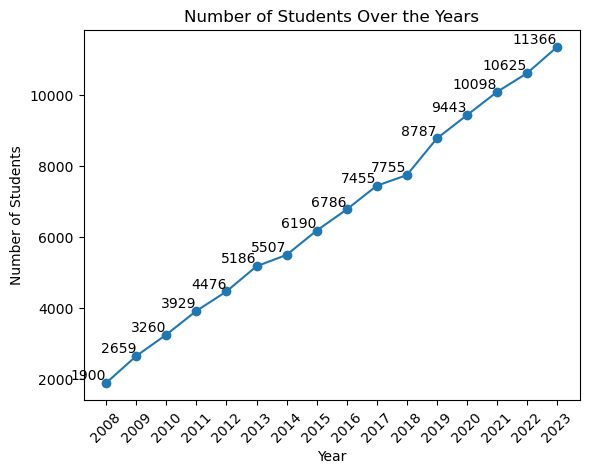

In [ ]:
plot_line_graph(dataframes_list)


In [ ]:
import matplotlib.pyplot as plt

def plot_multi_line_graph(dataframes_list):
    """
    Plot a multi-line graph with the x-axis representing the year
    and the y-axis representing the number of students per degree.

    Parameters:
    - dataframes_list (list): List of pandas DataFrames.

    Returns:
    - None (displays the plot).
    """
    # Initialize a dictionary to store data for each degree
    degree_data = {degree: [] for degree in dataframes_list[0]['Degree'].unique()}
    years = []

    # Extract year and number of students for each degree
    for df in dataframes_list:
        year = df['Year'].unique()[0]
        years.append(year)

        for degree in degree_data.keys():
            num_students = len(df[df['Degree'] == degree])
            degree_data[degree].append(num_students)

    # Plotting
    for degree, data in degree_data.items():
        plt.plot(years, data, marker='o', linestyle='-', label=degree)

    plt.title('Number of Students Per Degree Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Students')
#     plt.grid(True)
    plt.legend()  # Show legend with degree labels
    plt.xticks(rotation=45)
    plt.show()




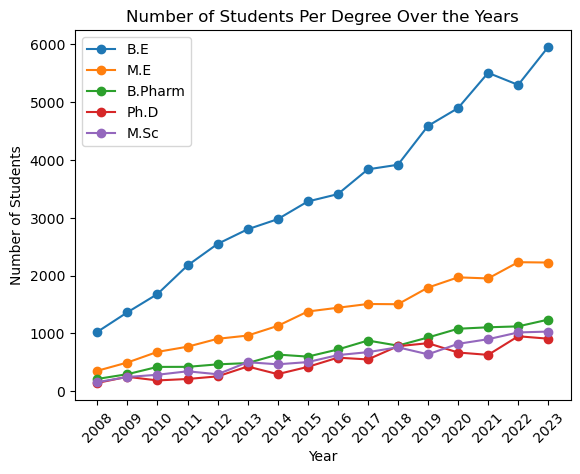

In [ ]:
plot_multi_line_graph(dataframes_list)


In [ ]:
def visualize_degree_distribution(dataframes_list):
    """
    Visualize the degree distribution using a bar chart.

    Parameters:
    - dataframes_list (list): List of pandas DataFrames.

    Returns:
    - None (displays the plot).
    """
    # Concatenate all dataframes into a single dataframe
    all_data = pd.concat(dataframes_list, ignore_index=True)

    # Count the number of students in each degree
    degree_counts = all_data['Degree'].value_counts()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=degree_counts.index, y=degree_counts.values, palette="viridis")
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Number of Students')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()


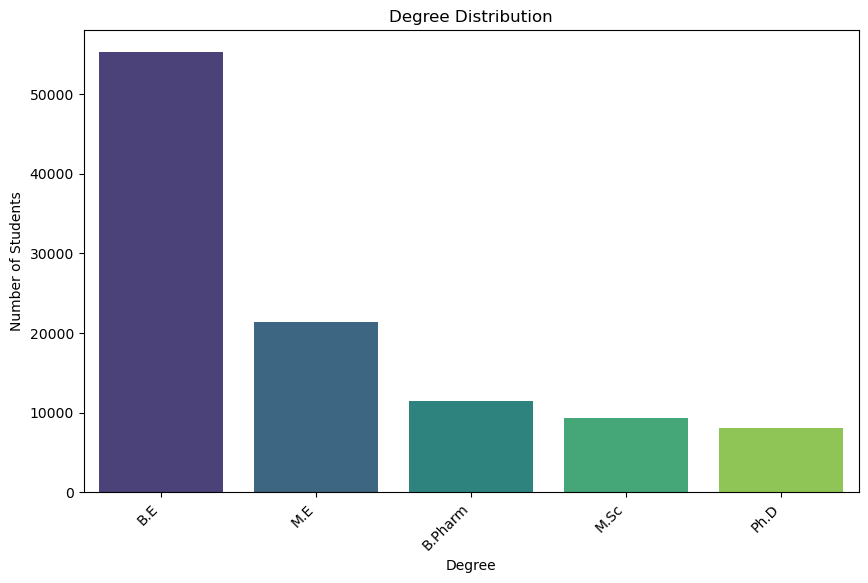

In [ ]:
visualize_degree_distribution(dataframes_list)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_stacked_bar(dataframes_list):
    """
    Visualize a stacked bar graph for degree distribution.

    Parameters:
    - dataframes_list (list): List of pandas DataFrames.

    Returns:
    - None (displays the plot).
    """
    # Concatenate all dataframes into a single dataframe
    all_data = pd.concat(dataframes_list, ignore_index=True)

    # Count the number of students for each degree and year
    degree_counts = all_data.groupby(['Year', 'Degree']).size().unstack().fillna(0)

    # Plotting
    plt.figure(figsize=(12, 8))
    degree_counts.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)
    plt.title('Stacked Bar Graph - Degree Distribution')
    plt.xlabel('Year')
    plt.ylabel('Number of Students')
    plt.legend(title='Degree', bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

# Example usage:
# Call this function passing your list of dataframes
# visualize_stacked_bar(dataframes_list)


<Figure size 1200x800 with 0 Axes>

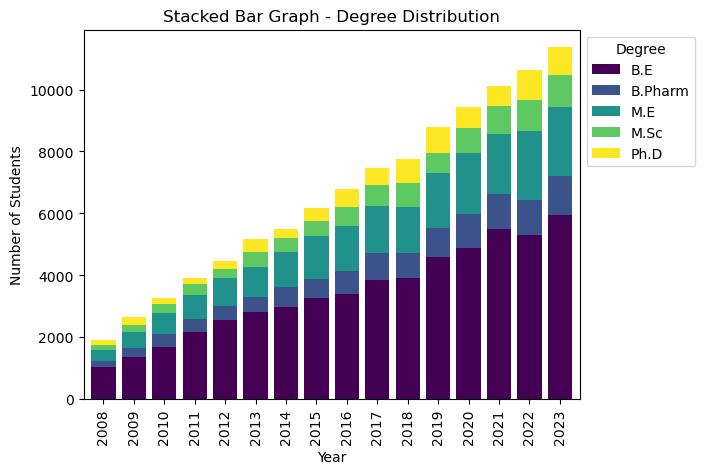

In [ ]:
visualize_stacked_bar(dataframes_list)

In [10]:
import plotly.express as px

def visualize_treemap(dataframes_list):
    """
    Visualize a treemap for degree distribution.

    Parameters:
    - dataframes_list (list): List of pandas DataFrames.

    Returns:
    - None (displays the plot).
    """
    # Concatenate all dataframes into a single dataframe
    all_data = pd.concat(dataframes_list, ignore_index=True)

    # Count the number of students for each degree and year
    degree_counts = all_data.groupby(['Year', 'Degree']).size().reset_index(name='Count')

    # Plotting
    fig = px.treemap(degree_counts, path=['Year', 'Degree'], values='Count', color='Count',
                     color_continuous_scale='Viridis', title='Treemap - Degree Distribution')

    fig.show()

# Example usage:
# Call this function passing your list of dataframes
# visualize_treemap(dataframes_list)


In [11]:
visualize_treemap(dataframes_list)

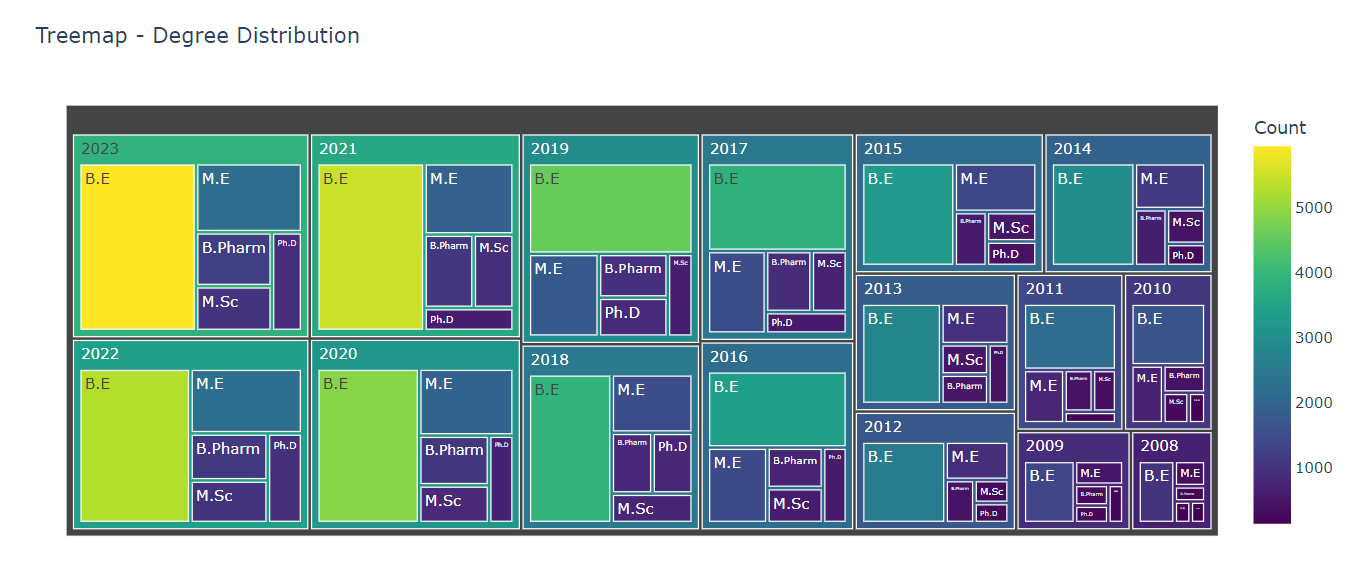

Static image for plotly graph

In [12]:
import plotly.express as px

def visualize_circle_packing(dataframes_list):
    """
    Visualize a circle packing chart for degree and course distribution.

    Parameters:
    - dataframes_list (list): List of pandas DataFrames.

    Returns:
    - None (displays the plot).
    """
    # Concatenate all dataframes into a single dataframe
    all_data = pd.concat(dataframes_list, ignore_index=True)

    # Count the number of students for each degree and course
    counts = all_data.groupby(['Degree', 'Course']).size().reset_index(name='Count')

    # Plotting
    fig = px.sunburst(counts, path=['Degree', 'Course'], values='Count',
                      title='Circle Packing - Degree and Course Distribution',
                      color='Count', color_continuous_scale='Viridis')

    fig.show()

# Example usage:
# Call this function passing your list of dataframes
# visualize_circle_packing(dataframes_list)


In [13]:
visualize_circle_packing(dataframes_list)


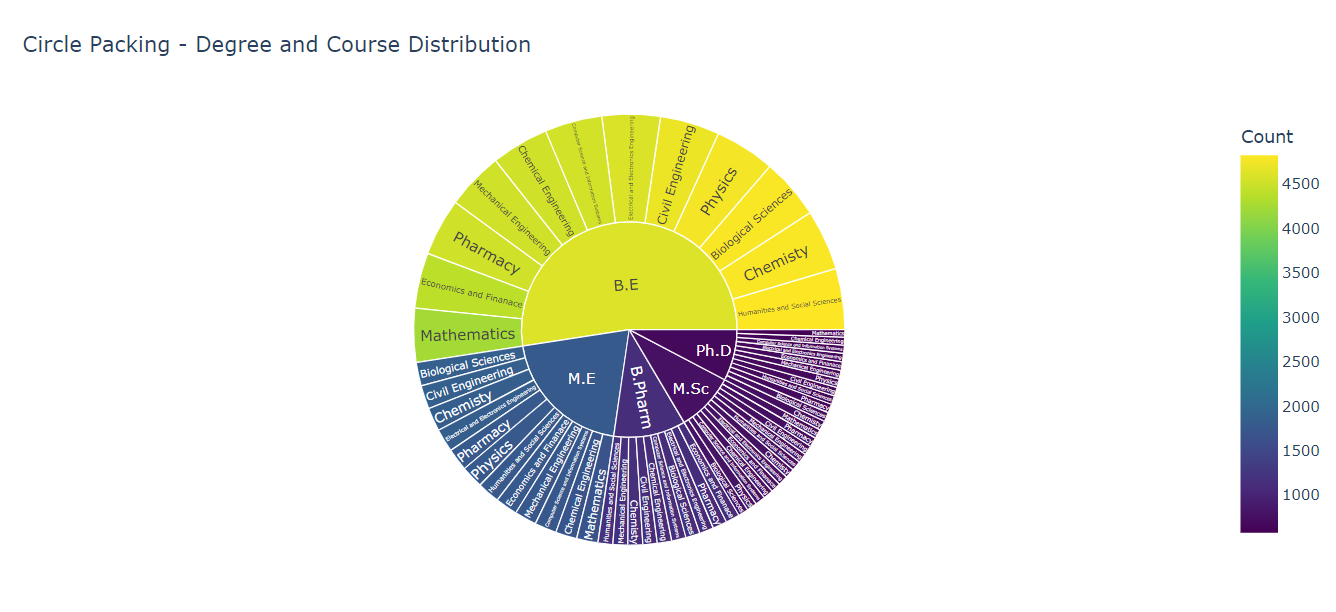

Static image for plotly graph

In [ ]:
def visualize_cgpa_heatmap(dataframes_list):
    """
    Visualize a heatmap of CGPA by Year and Degree.

    Parameters:
    - dataframes_list (list): List of pandas DataFrames.

    Returns:
    - None (displays the plot).
    """
    # Concatenate all dataframes into a single dataframe
    all_data = pd.concat(dataframes_list, ignore_index=True)

    # Create a pivot table for CGPA by Year and Degree
    cgpa_pivot = all_data.pivot_table(values='CGPA', index='Year', columns='Degree', aggfunc='mean')

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.heatmap(cgpa_pivot, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
    plt.title('Heatmap of CGPA by Year and Degree')
    plt.xlabel('Degree')
    plt.ylabel('Year')
    plt.show()

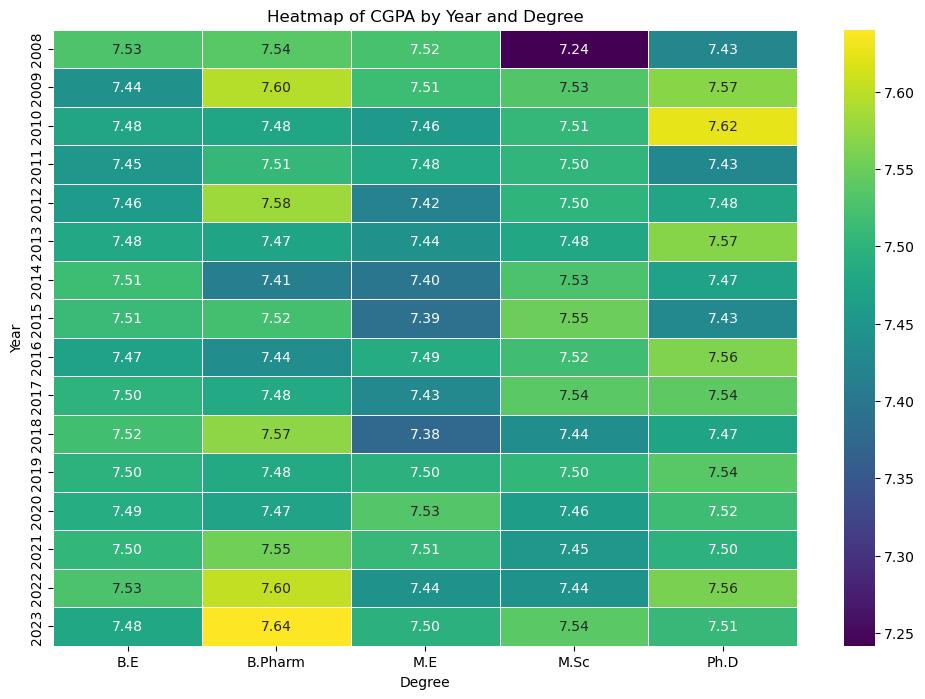

In [ ]:
visualize_cgpa_heatmap(dataframes_list)

In [ ]:
def visualize_cgpa_violin(dataframes_list):
    """
    Visualize a violin plot of CGPA distribution by degree.

    Parameters:
    - dataframes_list (list): List of pandas DataFrames.

    Returns:
    - None (displays the plot).
    """
    # Concatenate all dataframes into a single dataframe
    all_data = pd.concat(dataframes_list, ignore_index=True)

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='Degree', y='CGPA', data=all_data, palette='viridis')
    plt.title('Violin Plot of CGPA Distribution by Degree')
    plt.xlabel('Degree')
    plt.ylabel('CGPA')
    plt.show()

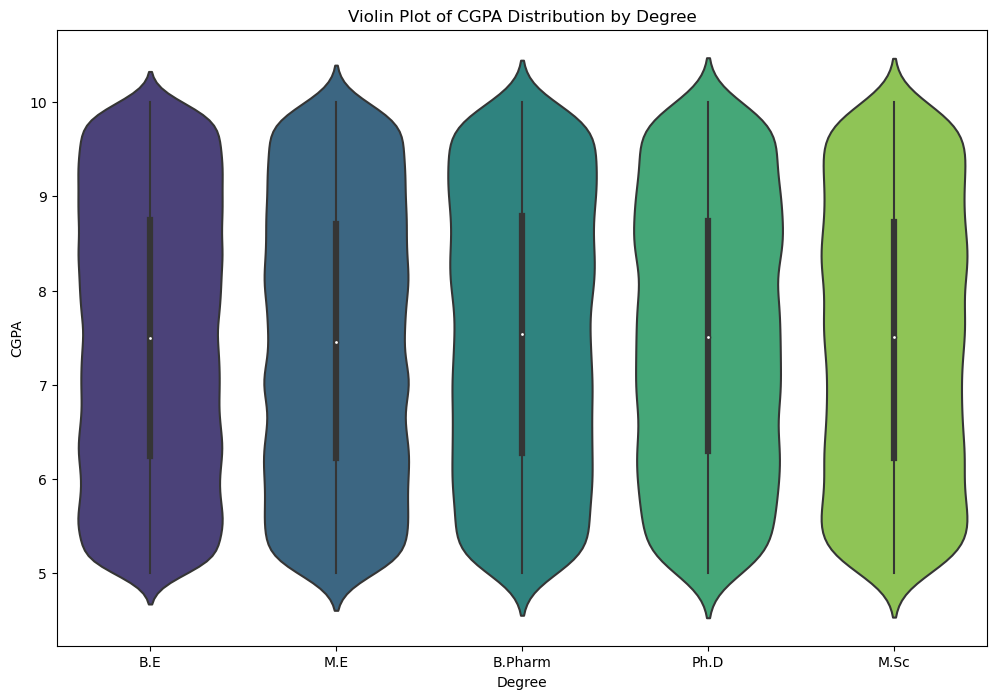

In [ ]:
visualize_cgpa_violin(dataframes_list)